<a href="https://colab.research.google.com/github/sanhiitaa/customer-segmentation-rfm-analysis/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Using the above data, find useful insights about the customer purchasing history
that can be an added advantage for the online retailer.
2. Segment the customers based on their purchasing behavior

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/drive/MyDrive/datasets/OnlineRetail.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

## Cleaning Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


1. The data has 8 columns, 1 int, 2 float, 5 object type, and total 541909 rows.

2. There seem to be null values present in the data, which warrants a need to search for duplicates as well.

In [5]:
# checking for duplicates
print(df.duplicated().sum())

# treating duplicates
df=df.drop_duplicates()

5268


In [6]:
# checking for percentage of null values
print((df.isnull().sum()/len(df))*100)

# in the customer id column, we will drop the rows with null values.
# treating null values
df=df.dropna(subset='CustomerID',axis=0)

# null values after treatement
print(f'\n\n-----------------\n\n{(df.isnull().sum()/len(df))*100}')

InvoiceNo       0.000000
StockCode       0.000000
Description     0.270945
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.163377
Country         0.000000
dtype: float64


-----------------

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64


In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
# products that were cancelled are identified with a C in the invoice number and contribute to all the negative values.
print(df[df.InvoiceNo.str.contains('C')])

# removing all cancelled products from the dataset
df=df[~df.InvoiceNo.str.contains('C',na=False)]

       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

            InvoiceDate  UnitPrice  CustomerID         Country  
141      12/1/2010 9:41      27.50     14527.0

In [10]:
# exploring basic statistics
df.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [11]:
# checking for entries which are not products but rather adjustments, only the title letter is capitalized
print(df[df['Description'].str.istitle()==True])

# removing these values from the data
df=df[~df['Description'].str.istitle()==True]

       InvoiceNo     StockCode        Description  Quantity      InvoiceDate  \
2239      536569             M             Manual         1  12/1/2010 15:35   
2250      536569             M             Manual         1  12/1/2010 15:35   
4406      536779  BANK CHARGES       Bank Charges         1  12/2/2010 15:08   
6798      536981             M             Manual         2  12/3/2010 14:26   
7976      537077             M             Manual        12  12/5/2010 11:59   
...          ...           ...                ...       ...              ...   
534008    581127  BANK CHARGES       Bank Charges         1  12/7/2011 12:45   
534091    581132         23444  Next Day Carriage         1  12/7/2011 12:55   
536863    581221         23444  Next Day Carriage         1   12/8/2011 9:40   
537782    581336         23444  Next Day Carriage         1  12/8/2011 12:10   
538321    581405             M             Manual         3  12/8/2011 13:50   

        UnitPrice  CustomerID         C

In [12]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392353.000000,392353.000000,392353.000000
mean,13.148496,2.998207,15287.636335
std,181.636906,15.045821,1713.455965
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [13]:
# # making a list of numeric columns for outlier analysis
# numcols=[x for x in df.columns if df[x].dtype=='float64']

# for i,col in enumerate(numcols):
#   # cleaning outliers
#   # calculating quantiles
#   q1=df[col].quantile(0.25)
#   q3=df[col].quantile(0.75)

#   # defining IQR(inter-quartile range)
#   iqr=q3-q1

#   # defining upper and lower limits
#   upper=q3 + (1.5 * iqr)
#   lower=q1 - (1.5 * iqr)

#   # redefining data
#   df=df[(df[col]<=upper) & (df[col]>=lower)]
#   plt.subplot(1,2,i+1)
#   sns.boxplot(df[col])


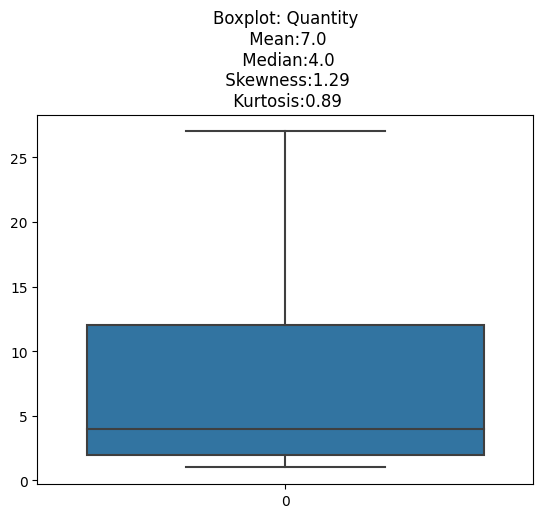

In [14]:
# treating outliers for the Quantity column
q1=df['Quantity'].quantile(0.25)
q3=df['Quantity'].quantile(0.75)

# defining IQR(inter-quartile range)
iqr=q3-q1

# defining upper and lower limits
upper=q3 + (1.5 * iqr)
lower=q1 - (1.5 * iqr)

# redefining data
y=df[(df['Quantity']<=upper) & (df['Quantity']>=lower)]['Quantity']
df=df[(df['Quantity']<=upper) & (df['Quantity']>=lower)]
# checking some values
skewness = round(y.skew(),2)
kurtosis = round(y.kurtosis(),2)
mean = round(np.mean(y),0)
median = np.median(y)


sns.boxplot(y)
plt.title('Boxplot: Quantity\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis));

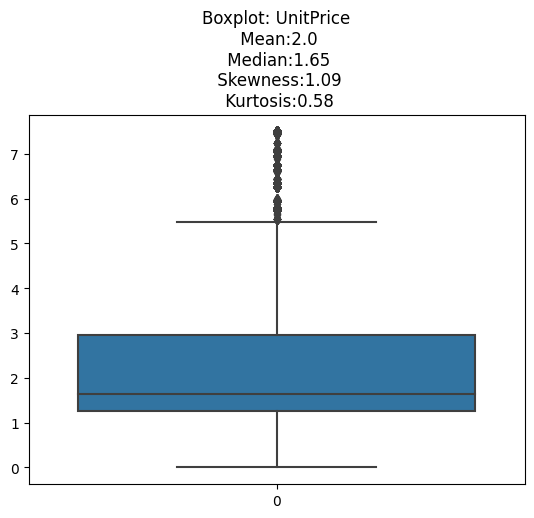

In [15]:
q1=df['UnitPrice'].quantile(0.25)
q3=df['UnitPrice'].quantile(0.75)

# defining IQR(inter-quartile range)
iqr=q3-q1

# defining upper and lower limits
upper=q3 + (1.5 * iqr)
lower=q1 - (1.5 * iqr)

# redefining data
y=df[(df['UnitPrice']<=upper) & (df['UnitPrice']>=lower)]['UnitPrice']
df=df[(df['UnitPrice']<=upper) & (df['UnitPrice']>=lower)]

# checking some values
skewness = round(y.skew(),2)
kurtosis = round(y.kurtosis(),2)
mean = round(np.mean(y),0)
median = np.median(y)


sns.boxplot(y)
plt.title('Boxplot: UnitPrice\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis));

In [16]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,333085.000000,333085.000000,333085.000000
mean,7.552388,2.194495,15318.610277
std,6.777632,1.546085,1711.146310
min,1.000000,0.000000,12347.000000
25%,2.000000,1.250000,13988.000000
50%,6.000000,1.650000,15232.000000
75%,12.000000,2.950000,16814.000000
max,27.000000,7.500000,18287.000000


In the `UnitPrice` column, the minimum value turns out to be 0, which can be a case of products that were given out for free with certain orders or wrong entries. We will take out rows with this value because we are trying to figure out purchasing behaviour and these rows can distort results.

In [17]:
# taking out rows where UnitPrice=0
df=df[~(df.UnitPrice==0.0)]

In [18]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,333060.000000,333060.000000,333060.000000
mean,7.552384,2.194660,15318.674281
std,6.777539,1.546026,1711.123755
min,1.000000,0.001000,12347.000000
25%,2.000000,1.250000,13988.000000
50%,6.000000,1.650000,15234.000000
75%,12.000000,2.950000,16814.000000
max,27.000000,7.500000,18287.000000


- Maximum value for outliers in UnitPrice is 7.5, which is valid extreme and thus can be kept in the analysis.

## Exploratory Data Analysis

United Kingdom          90.106888
Germany                  2.235933
France                   2.068396
EIRE                     1.634240
Spain                    0.612502
Belgium                  0.498409
Switzerland              0.430253
Portugal                 0.375608
Norway                   0.231790
Netherlands              0.185252
Italy                    0.181349
Channel Islands          0.163934
Finland                  0.155528
Australia                0.153126
Cyprus                   0.142617
Austria                  0.102984
Denmark                  0.089173
Poland                   0.075962
Sweden                   0.074761
Unspecified              0.063052
Israel                   0.056747
Iceland                  0.049841
USA                      0.048039
Singapore                0.045337
Canada                   0.037831
Greece                   0.037531
Japan                    0.033027
Malta                    0.027322
United Arab Emirates     0.017414
European Commu

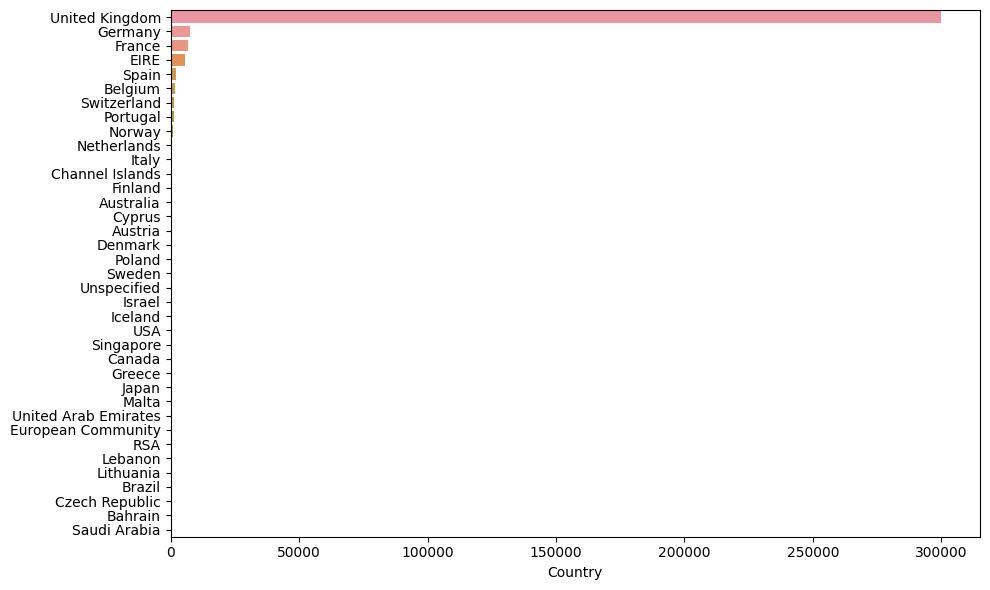

In [19]:
# counting orders from each countries
val=df.Country.value_counts()
print((val/len(df)*100))

# setting up figure size
plt.figure(figsize=(10,6))

# plotting count of country-wise purchases
sns.barplot(x=val, y=val.index)
plt.tight_layout()

- 90.01% purchases were made from United Kingdom suggesting that the business is UK based.

In [20]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [21]:
# creating a total price column
df['total-price']=df['UnitPrice'] * df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total-price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [22]:
df.describe()

,Quantity,UnitPrice,CustomerID,total-price
count,333060.000000,333060.000000,333060.000000,333060.000000
mean,7.552384,2.194660,15318.674281,12.907186
std,6.777539,1.546026,1711.123755,13.216292
min,1.000000,0.001000,12347.000000,0.001000
25%,2.000000,1.250000,13988.000000,3.950000
50%,6.000000,1.650000,15234.000000,10.140000
75%,12.000000,2.950000,16814.000000,17.400000
max,27.000000,7.500000,18287.000000,178.800000


In [23]:
# grouping by invoice to see the amount of purchases made at individual invoice level
inv=df.groupby('InvoiceNo')['total-price'].sum().sort_values(ascending=False).reset_index()
inv

,InvoiceNo,total-price
0,580727,4721.74
1,576339,4650.50
2,578305,4176.37
3,579196,4100.86
4,574328,3772.97
...,...,...
16812,538194,0.95
16813,548657,0.85
16814,540945,0.85
16815,542736,0.55


- Highest amount of purchase was made by the invoice number **580727** and the amount is **$4721.74**

- Lowest amount of purchase was made by the invoice number **570554** and the amount is	**$0.38**


In [24]:
# function to annotate barplots:

# for horizontal barplots
def ann_horizontal(ax):
  for p in ax.patches:
    height=p.get_height()/2
    width=p.get_width()
    ax.annotate(f'{width:.2f}', (width, p.get_y()+height),
                ha='left', va='center',
                textcoords='data')

# for vertical barplots
def ann_vertical(ax):
  for p in ax.patches:
    height=p.get_height()
    width=p.get_width()/2
    ax.annotate(f'{height:.2f}', (p.get_x()+ width, height),
                ha='center', va='bottom',
                textcoords='data')

### Top 10 products:

In [25]:
# top 10 products in the UK
top10products=df[df.Country=='United Kingdom'].groupby('Description')['total-price'].sum().sort_values(ascending=False).reset_index()[:10]
top10products.nlargest(10,'total-price')


,Description,total-price
0,PARTY BUNTING,32456.40
1,WHITE HANGING HEART T-LIGHT HOLDER,29905.26
2,JUMBO BAG RED RETROSPOT,21991.09
3,ASSORTED COLOUR BIRD ORNAMENT,21961.55
4,SPOTTY BUNTING,21038.05
5,HOT WATER BOTTLE KEEP CALM,19645.95
6,CHILLI LIGHTS,18133.20
7,CHOCOLATE HOT WATER BOTTLE,17620.95
8,SET OF 3 CAKE TINS PANTRY DESIGN,17555.72
9,JAM MAKING SET WITH JARS,17378.50


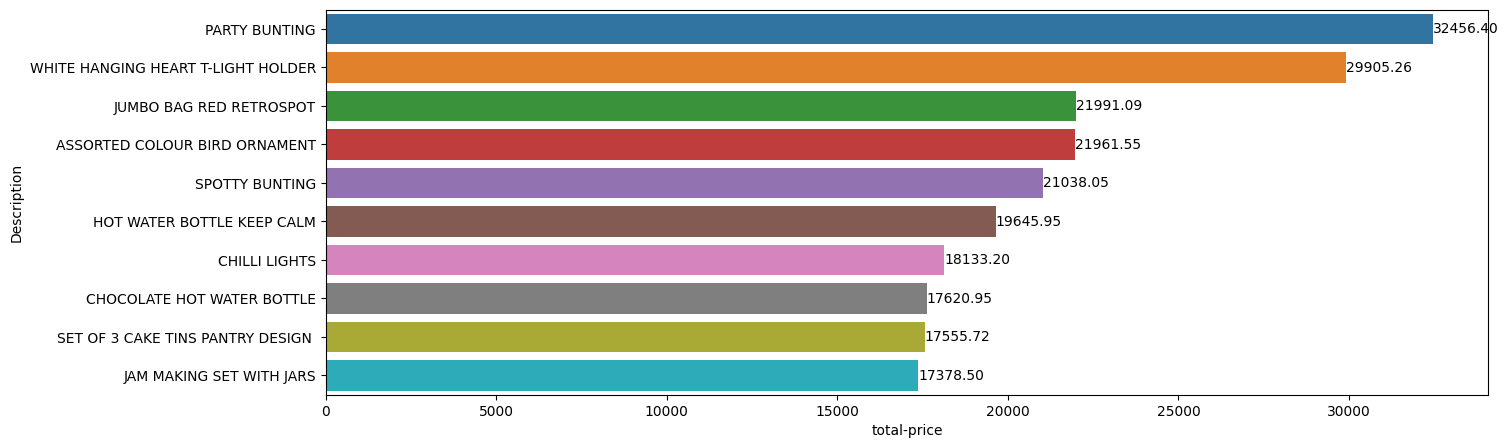

In [26]:
plt.figure(figsize=(15,5))
ax=sns.barplot(x=top10products['total-price'], y=top10products['Description'])
ann_horizontal(ax);

In [27]:
# top 10 products outside UK
top10productsouk=df[df.Country!='United Kingdom'].groupby('Description')['total-price'].sum().sort_values(ascending=False).reset_index()[:10]
top10productsouk.nlargest(10,'total-price')

,Description,total-price
0,ROUND SNACK BOXES SET OF4 WOODLAND,6905.95
1,PLASTERS IN TIN CIRCUS PARADE,3997.95
2,ROUND SNACK BOXES SET OF 4 FRUITS,3988.40
3,PLASTERS IN TIN WOODLAND ANIMALS,3976.50
4,RETROSPOT TEA SET CERAMIC 11 PC,3885.00
5,SPACEBOY LUNCH BOX,3874.65
6,JAM MAKING SET WITH JARS,3758.75
7,RED TOADSTOOL LED NIGHT LIGHT,3648.15
8,ALARM CLOCK BAKELIKE PINK,3236.25
9,SET OF 3 REGENCY CAKE TINS,3154.70


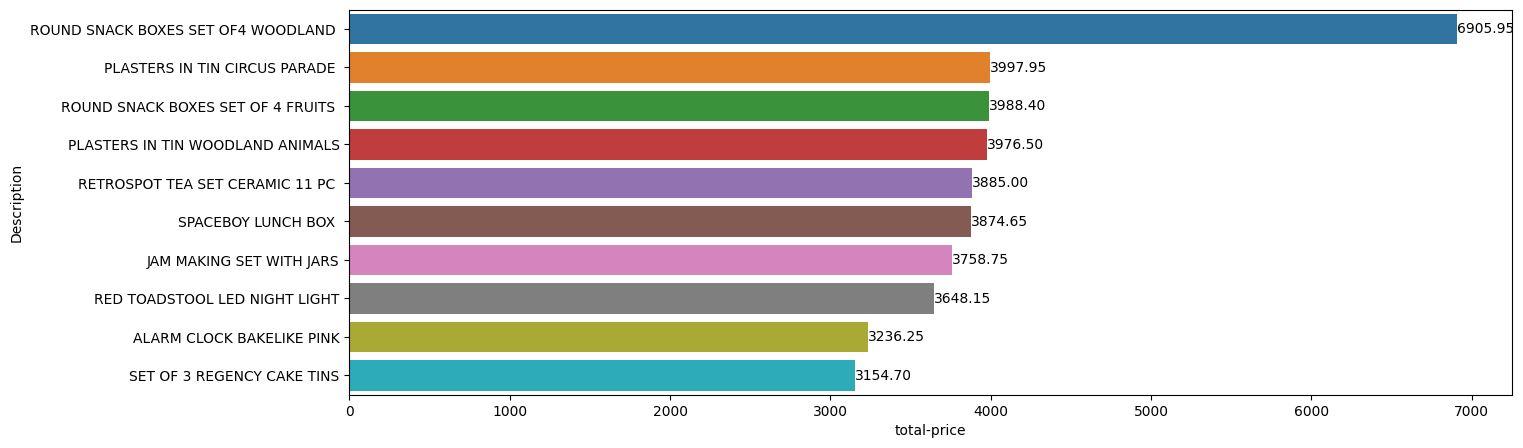

In [28]:
plt.figure(figsize=(15,5))
ax=sns.barplot(x=top10productsouk['total-price'], y=top10productsouk['Description'])
ann_horizontal(ax);

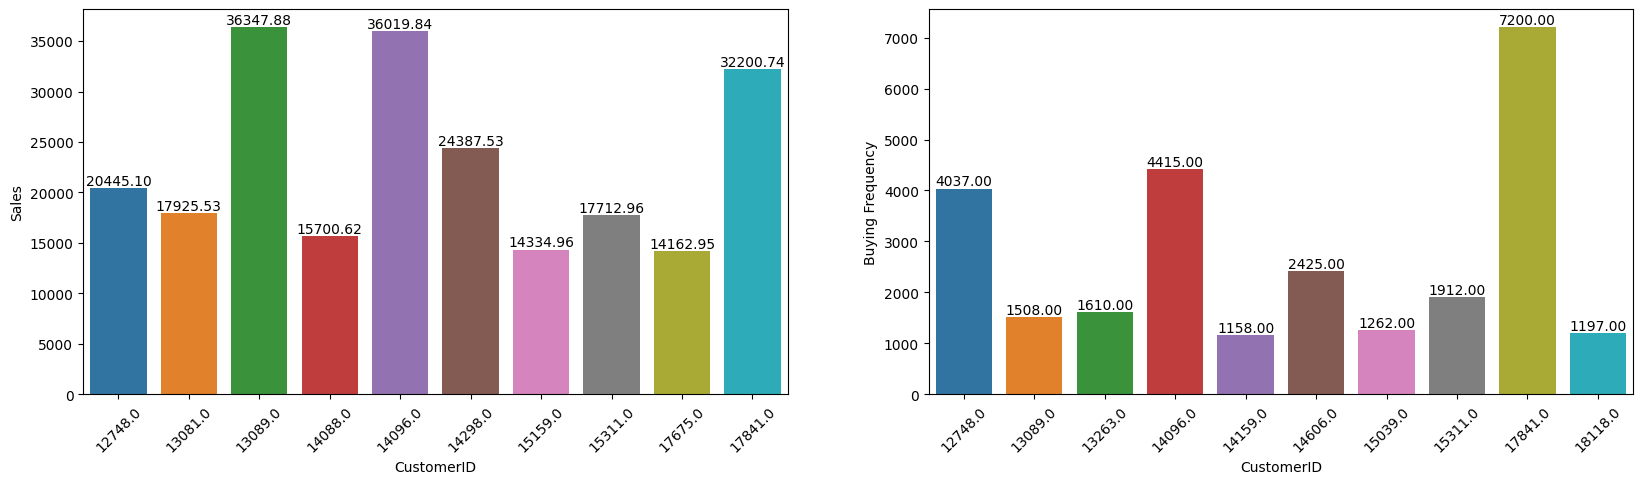

In [29]:
plt.figure(figsize=(20,5))
# top 10 customers in UK based on sales
plt.subplot(1,2,1)
sales=df[df['Country']=='United Kingdom'].groupby(['CustomerID'])['total-price'].sum().sort_values(ascending=False).head(10)
ax=sns.barplot(x=sales.index, y=sales.values)
plt.xticks(rotation=45)
plt.ylabel('Sales')
ann_vertical(ax);

# Top 10 uk customers based on frequency of purchases
plt.subplot(1,2,2)
frequency=df[df['Country']=='United Kingdom'].groupby(['CustomerID'])['InvoiceNo'].count().sort_values(ascending=False).head(10)
ax=sns.barplot(x=frequency.index, y=frequency.values)
plt.xticks(rotation=45)
plt.ylabel('Buying Frequency')
ann_vertical(ax);

In [30]:
# converting datatype for InvoiceDate to datetime
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

# making separate columns for time values
df['month']=df['InvoiceDate'].dt.month
df['year']=df['InvoiceDate'].dt.year
df['day'] = df['InvoiceDate'].dt.day
df['hour'] = df['InvoiceDate'].dt.hour
df['day_of_week'] = df['InvoiceDate'].dt.dayofweek

In [32]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total-price,month,year,day,hour,day_of_week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2010,1,8,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,1,8,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2010,1,8,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,1,8,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,1,8,2


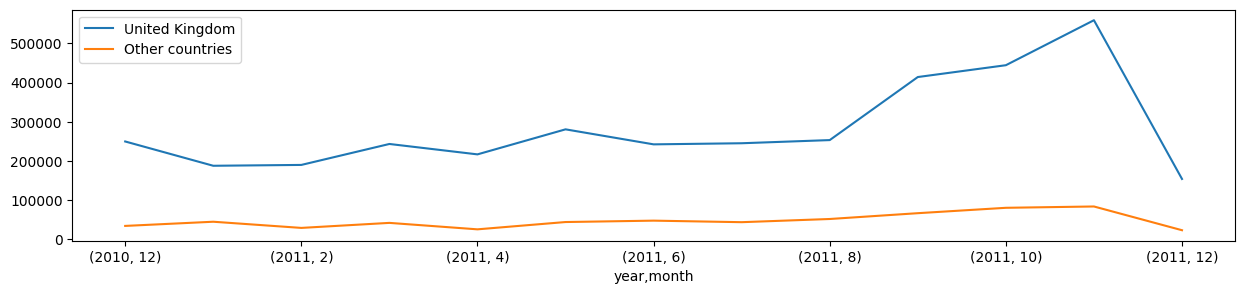

In [74]:
plt.figure(figsize=(15,3))
a=df[df.Country=='United Kingdom'].groupby(['year','month'])['total-price'].sum().plot(kind='line', label='United Kingdom')
b=df[df.Country!='United Kingdom'].groupby(['year','month'])['total-price'].sum().plot(kind='line', label='Other countries')

plt.legend();

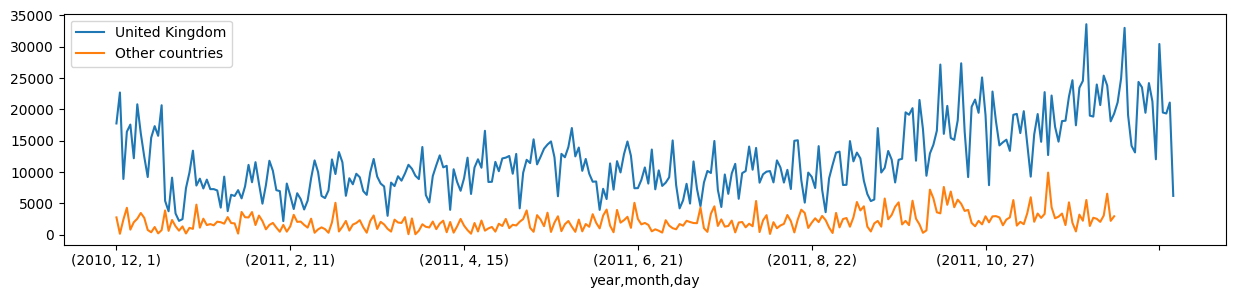

In [73]:
plt.figure(figsize=(15,3))

# sales on a day basis for UK and other countries
a=df[df.Country=='United Kingdom'].groupby(['year','month','day'])['total-price'].sum().plot(kind='line', label='United Kingdom')
b=df[df.Country!='United Kingdom'].groupby(['year','month','day'])['total-price'].sum().plot(kind='line', label='Other countries')

plt.legend();

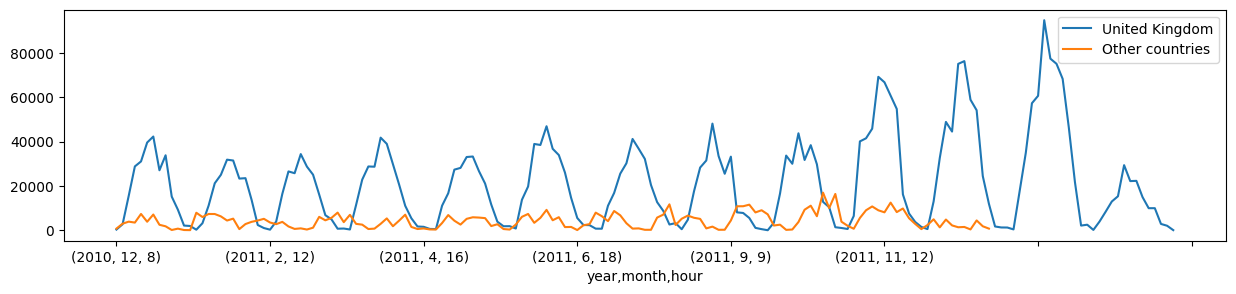

In [79]:
plt.figure(figsize=(15,3))

# sales on a day basis for UK and other countries
a=df[df.Country=='United Kingdom'].groupby(['year','month','hour'])['total-price'].sum().plot(kind='line', label='United Kingdom')
b=df[df.Country!='United Kingdom'].groupby(['year','month','hour'])['total-price'].sum().plot(kind='line', label='Other countries')

plt.legend();

## RFM Analysis

In [120]:
# creating a new dataframe for rfm analysis
df1=df.iloc[:,:9].copy()

In [121]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total-price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [122]:
# extracting recency

rfmdf=df1.groupby('CustomerID')['InvoiceDate'].max().reset_index() #extracting most recent visit of a customer
rfmdf['most-recent-date']=rfmdf['InvoiceDate'].max() #making a new column with the latest date of purchase acting as a relative timeframe
rfmdf['recency']=(rfmdf['most-recent-date'] - rfmdf['InvoiceDate']).dt.days +1 #calculating the number of days since the customer made their last purchase
rfmdf=rfmdf[['CustomerID','recency']] #keeping only relevant columns
rfmdf.head()

#  extracting frequency

rfmdf['frequency']=df1.groupby('CustomerID')['InvoiceNo'].nunique().values

# extracting monetary

rfmdf['monetary']=df1.groupby('CustomerID')['total-price'].sum().values

rfmdf.head()

,CustomerID,recency,frequency,monetary
0,12347.0,2,7,3314.73
1,12348.0,249,3,90.20
2,12349.0,19,1,999.15
3,12350.0,310,1,294.40
4,12352.0,36,7,1130.94


In [123]:
rfmdf.describe()

,CustomerID,recency,frequency,monetary
count,4191.000000,4191.000000,4191.000000,4191.000000
mean,15290.900262,92.534717,4.012646,1025.737880
std,1719.057238,99.918421,7.016046,2199.890753
min,12347.000000,1.000000,1.000000,1.900000
25%,13809.500000,18.000000,1.000000,206.160000
50%,15281.000000,51.000000,2.000000,465.970000
75%,16770.500000,144.000000,4.000000,1126.295000
max,18287.000000,374.000000,196.000000,84980.890000


In [135]:
# function to check skewness

def skew_vals(y):
  '''
  pre-requsite:
  y is a pandas series
  '''
  skewness = round(y.skew(),2)
  kurtosis = round(y.kurtosis(),2)
  mean = round(np.mean(y),0)
  median = np.median(y)

  print('\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis));

In [139]:
# checking for columns which need outlier treatment
print('Recency:')
y=rfmdf['recency']
skew_vals(y)

print('\n-------------------------------------------------------------------------------\n')

print('Frequency:')
y=rfmdf['frequency']
skew_vals(y)

print('\n-------------------------------------------------------------------------------\n')

print('Monetary:')
y=rfmdf['monetary']
skew_vals(y)

Recency:

 Mean:93.0
 Median:51.0
 Skewness:1.24
 Kurtosis:0.42

-------------------------------------------------------------------------------

Frequency:

 Mean:4.0
 Median:2.0
 Skewness:13.31
 Kurtosis:298.63

-------------------------------------------------------------------------------

Monetary:

 Mean:1026.0
 Median:465.97
 Skewness:17.57
 Kurtosis:555.46


Frequency and Monetary needs outlier treatment, Recency has a small amount of skewness which is passable.

In [151]:
# function to calculate q1, q2, iqr, upper, lower values

def outlier_cal(y):
  '''
  y is a pandas numerical series
  '''
  q1=y.quantile(0.25)
  q3=y.quantile(0.75)

  iqr=q3-q1

  upper=q3+(1.5*iqr)
  lower=q1-(1.5*iqr)

  print(f'''q1: {q1}\nq3: {q3}\niqr:{iqr}\nupper:{upper}\nlower:{lower}
        ''')

In [152]:
# outlier treatment

# on frequency
y=rfmdf['frequency']
outlier_cal(y)

# on monetary
y=rfmdf['monetary']
outlier_cal(y)

q1: 1.0
q3: 4.0
iqr:3.0
upper:8.5
lower:-3.5
        
q1: 206.16
q3: 1126.295
iqr:920.1350000000001
upper:2506.4975000000004
lower:-1174.0425
        


In [ ]:
# note to self
treat outliers
scale the columns
apply kmeans
group them accordingly


In [124]:
cols_to_scale=['recency','frequency','monetary']

rfm_scaled=pd.DataFrame()
rfm_scaled['customer-id']=rfmdf.CustomerID

In [125]:
# scaling data
# using minmaxscaler because it accomodates outliers, as i would like to work with the current outliers, they seem valid.
from sklearn.preprocessing import MinMaxScaler

# defining an object for minmaxscaler
mms=MinMaxScaler()

# applying minmaxscaler to the selected columns
rfm_scaled[cols_to_scale]=mms.fit_transform(rfmdf[cols_to_scale])

# scaled dataframe
rfm_scaled.head()

,CustomerID,recency,frequency,monetary
0,12347.0,2,7,3314.73
1,12348.0,249,3,90.20
2,12349.0,19,1,999.15
3,12350.0,310,1,294.40
4,12352.0,36,7,1130.94


In [127]:
x=rfm_scaled[['recency','frequency','monetary']]
x.head()

,recency,frequency,monetary
0,0.002681,0.030769,0.038984
1,0.664879,0.010256,0.001039
2,0.048257,0.000000,0.011735
3,0.828418,0.000000,0.003442
4,0.093834,0.030769,0.013286


In [128]:
# using k-means clustering to assign classes
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=4, random_state=999)
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=999)

In [33]:
# i am going to segment customers into 3 categories - churned, loyal, best customers based on
r=[]